In [20]:
import os
import sys
import argparse
import numpy as np
import json
import glob
from pathlib import Path
from tqdm import tqdm

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap




In [56]:
phecode_df = pickle.load(open('/Users/riccardoconci/Local_documents/!!GeomML_2025/GeomMLProj/temp_dfs_lite/phecode_df.pkl', 'rb'))

In [57]:
phecode_df.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,PheCode,long_title,Rollup_Status
0,10000032,22595853,1,5723,9,571.81,Portal hypertension,1
1,10000032,22595853,2,78959,9,572.00,Other ascites,1
2,10000032,22595853,3,5715,9,571.51,Cirrhosis of liver without mention of alcohol,1
3,10000032,22595853,4,07070,9,70.30,Unspecified viral hepatitis C without hepatic ...,1
4,10000032,22595853,5,496,9,496.00,"Chronic airway obstruction, not elsewhere clas...",1


In [54]:
import sys
sys.path.append('/Users/riccardoconci/Local_documents/!!GeomML_2025/GeomMLProj/')
from data_scripts.data_lite import MIMICContrastivePairsDatasetLite
from data_scripts.get_labels_fast import get_phecode_df

In [27]:


data_path = '/Users/riccardoconci/Local_documents/!!GeomML_2025/GeomMLProj/Embeddings/bs128_lr0.0005_seed42_proj256_temp0.07_phe/viz_embeddings_epoch_7_n4712.pkl'

# Load the embeddings
with open(data_path, "rb") as f:
    data = pickle.load(f)

# Access the data
hadm_ids = data["hadm_id"]
ts_embeddings = data["ts_embeddings"]
text_embeddings = data["text_embeddings"]

# Choose which embeddings to visualize
embeddings_to_use = ts_embeddings  # or text_embeddings

In [28]:
cache_dir = "/Users/riccardoconci/Local_documents/!!GeomML_2025/GeomMLProj/temp_dfs_lite"
dataset = MIMICContrastivePairsDatasetLite(split="val",
                                    cache_dir=cache_dir,
                                    task_mode="CONTRASTIVE",
                                    chunk_hours=12,
                                    label_window=24,
                                    T=80,
                                    test_ds_only=False)

Loaded baseline dataframe: /Users/riccardoconci/Local_documents/!!GeomML_2025/GeomMLProj/temp_dfs_lite/processed_baseline_df.pkl
Split by subject_id: 89988 train, 4999 val, 5000 test subjects
Corresponding to: 661908 train, 37814 val, 36527 test admissions


Filtering valid hadm_ids: 100%|██████████| 37814/37814 [00:00<00:00, 137242.33it/s]

Filtered 0 invalid hadm_ids, 37814 remaining


In [34]:
mort_labels = []
readm_labels = []
nxt_pad_labels = []
cur_pad_labels = []
curr_len_list = []
nxt_len_list = []

for i in range(len(hadm_ids)):
    mort, readm, cur_pad, cur_len, nxt_pad, nxt_len = dataset._fetch_labels(hadm_ids[i])
    mort_labels.append(mort)
    readm_labels.append(readm)
    nxt_pad_labels.append(nxt_pad)
    cur_pad_labels.append(cur_pad)
    curr_len_list.append(cur_len)
    nxt_len_list.append(nxt_len)



In [37]:
cur_pad_labels

[tensor([1081,  707,  710,  468,  397, 1788, 1788, 1788, 1788, 1788, 1788, 1788,
         1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788]),
 tensor([ 717,  719,  711,  777,  721, 1114,  233,  773,  764,  401,  704,  754,
          310,  408,  378, 1778,  490, 1709,  759, 1788]),
 tensor([1273, 1282,  379, 1228, 1291, 1288,  451,  445, 1771, 1788, 1788, 1788,
         1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788]),
 tensor([1523,  528,  880, 1129,   19, 1609,  710,  764, 1017, 1244, 1095,  992,
          446,  890,  360, 1788, 1788, 1788, 1788, 1788]),
 tensor([1666,  396,  840, 1668,  389,  819,  358,  766,  719,  717,  992, 1412,
          490,   98,  100,  813, 1788, 1788, 1788, 1788]),
 tensor([ 719,  710, 1166,  311, 1502,  490, 1787, 1788, 1788, 1788, 1788, 1788,
         1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788]),
 tensor([1039,  551,  155,  717, 1778,  107,  528,  710, 1771, 1747, 1788, 1788,
         1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788]),
 tensor([ 232, 1109,

In [31]:

# Run dimensionality reduction
print("Running UMAP dimensionality reduction...")
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
umap_result = reducer.fit_transform(embeddings_to_use)

# Run t-SNE as alternative
print("Running t-SNE dimensionality reduction...")
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(embeddings_to_use)


Running UMAP dimensionality reduction...


/Users/riccardoconci/miniforge3/envs/GeomML/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Running t-SNE dimensionality reduction...


/Users/riccardoconci/miniforge3/envs/GeomML/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [38]:
import numpy as np, torch, pandas as pd, umap, pickle, matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# ------------------------------------------------------------------
# 1)  MULTI-HOT MATRIX  (n_samples × 1788)
# ------------------------------------------------------------------
n_samples = len(cur_pad_labels)
N_PHE   = 1788                            # valid phecode indices are 0 … 1787
multi_hot = np.zeros((n_samples, N_PHE), dtype=np.uint8)

for i, (vec, L) in enumerate(zip(cur_pad_labels, curr_len_list)):
    codes = vec[:L].cpu().numpy() if torch.is_tensor(vec) else vec[:L]
    # codes are in 0 … 1787. 1788 is padding → ignore.
    multi_hot[i, codes] = 1

# ------------------------------------------------------------------
# 2)  COMPRESS → 3D  +  RESCALE → RGB
# ------------------------------------------------------------------
svd = TruncatedSVD(n_components=3, random_state=42)
rgb_raw = svd.fit_transform(multi_hot)          # (n_samples, 3)

scaler = MinMaxScaler()
rgb = scaler.fit_transform(rgb_raw)             # now in [0,1]

# helpful if you’d like explicit R,G,B columns later
r,g,b = rgb.T


Running UMAP dimensionality reduction …


/Users/riccardoconci/miniforge3/envs/GeomML/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Loaded PHE code mappings with 1788 unique codes


/var/folders/53/d8br5nln6vq67q925j2wx6kc0000gn/T/ipykernel_12065/3641701766.py:52: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


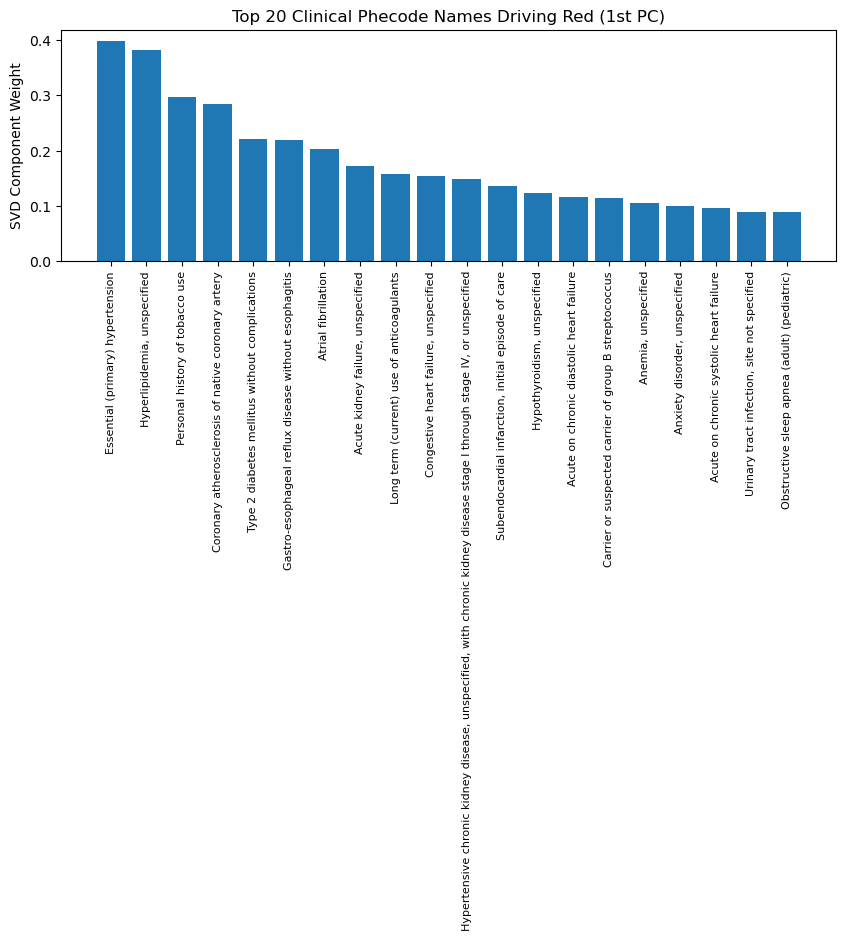

/var/folders/53/d8br5nln6vq67q925j2wx6kc0000gn/T/ipykernel_12065/3641701766.py:52: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


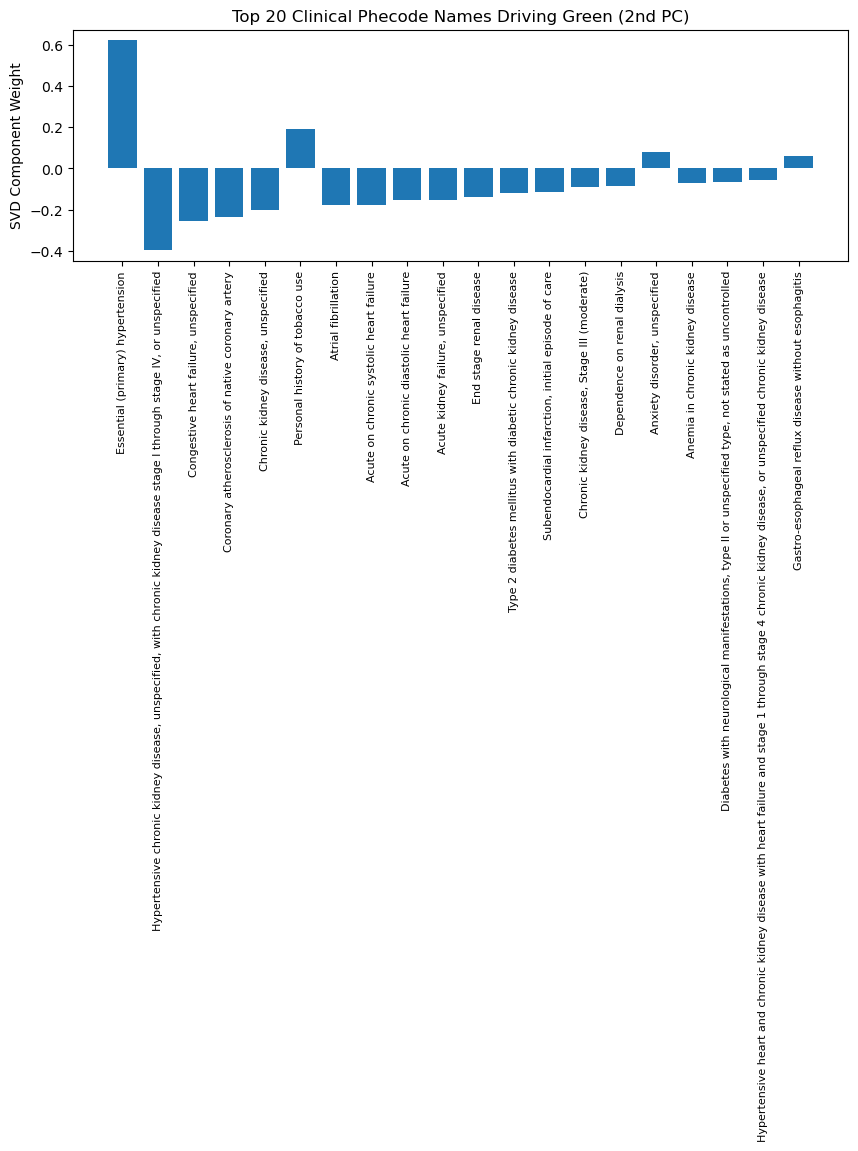

/var/folders/53/d8br5nln6vq67q925j2wx6kc0000gn/T/ipykernel_12065/3641701766.py:52: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


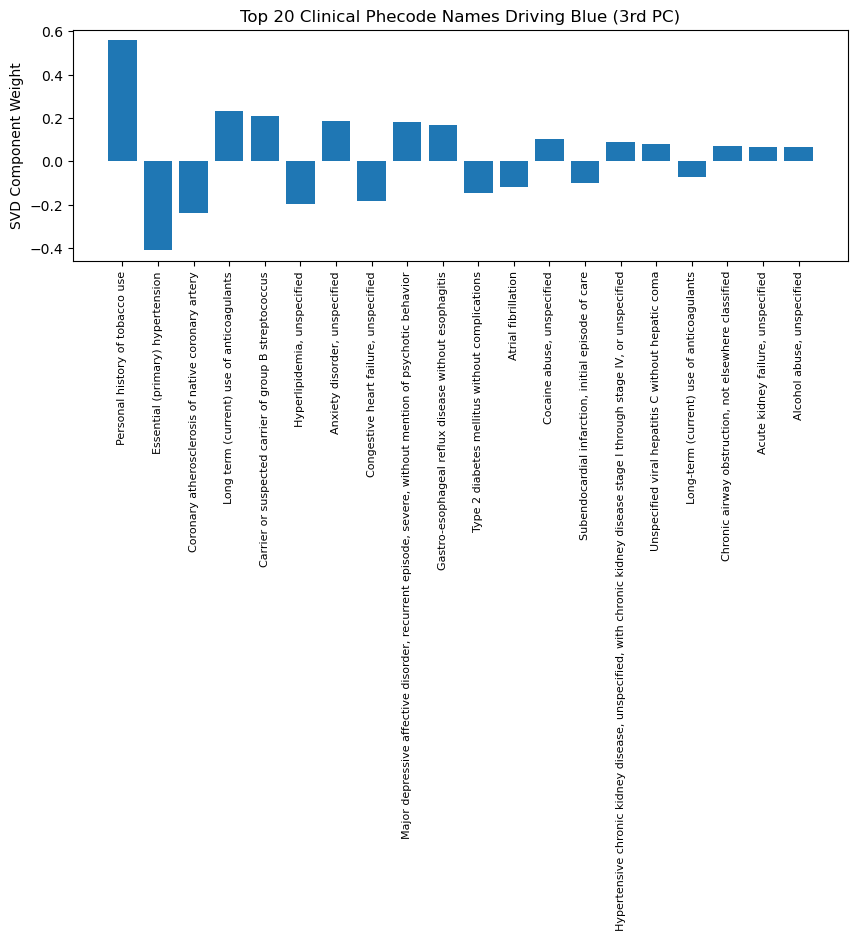

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# ── 1) Load your phecode mappings ────────────────────────────────────────────
# adjust these paths to your own cache/base directories
base_path  = "/Users/riccardoconci/Local_documents/!!MIMIC/hosp/"      
cache_dir  = "/Users/riccardoconci/Local_documents/!!GeomML_2025/GeomMLProj/temp_dfs_lite"

phecode_df, phecode_to_idx, idx_to_phecode, phe_code_size = get_phecode_df(base_path, cache_dir)
# idx_to_phecode: dict idx → phecode string (e.g. '250.2')

# ── 2) Recompute (or reuse) your multi-hot and SVD ──────────────────────────
# multi_hot: array shape (n_samples, phe_code_size), dtype uint8
# here’s the same rebuild you used before:
n_samples = len(cur_pad_labels)
multi_hot = np.zeros((n_samples, phe_code_size), dtype=np.uint8)
for i, (vec, L) in enumerate(zip(cur_pad_labels, curr_len_list)):
    codes = vec[:L].cpu().numpy() if hasattr(vec, "cpu") else vec[:L]
    multi_hot[i, codes] = 1

# run TruncatedSVD → 3 components
svd = TruncatedSVD(n_components=3, random_state=42)
_   = svd.fit_transform(multi_hot)   # you only need svd.components_

name_map = (
    phecode_df[['PheCode', 'long_title']]
    .drop_duplicates(subset='PheCode')
    .set_index('PheCode')['long_title']
    .to_dict()
)

# 2) Helper to get top k with names
def top_phecodes_for_channel(components, channel_idx, top_k=15):
    weights = components[channel_idx]
    idxs = np.argsort(np.abs(weights))[::-1][:top_k]
    phecodes = [ idx_to_phecode[i] for i in idxs ]
    titles   = [ name_map.get(code, code) for code in phecodes ]
    wts      = weights[idxs]
    return titles, wts

# 3) Plot bar charts with clinical titles
channels = ["Red (1st PC)", "Green (2nd PC)", "Blue (3rd PC)"]
for i, ch in enumerate(channels):
    titles, weights = top_phecodes_for_channel(svd.components_, i, top_k=20)

    plt.figure(figsize=(10, 3))
    plt.bar(range(len(weights)), weights, tick_label=titles)
    plt.xticks(rotation=90, fontsize=8)
    plt.ylabel("SVD Component Weight")
    plt.title(f"Top 20 Clinical Phecode Names Driving {ch}")
    plt.tight_layout()
    plt.show()

In [60]:
import os
import json
import pickle
import pandas as pd

def get_physio_category_prompt(phecode_names_chunk, previous_categories=None):
    prompt = f'''
Looking at the following list of phecode items, provide a category for each phecode. This is a single word based on organ function or basic physiology.
For example: renal, inflammatory, clotting, haematologic, endocrine, cardiovascular, hepatobiliary, respiratory , metabolic etc.
Don't use 'general' as a category.

Return only a valid JSON object without any additional text or markdown formatting.
- Do NOT include triple backticks or any markdown markers.

Names:
{phecode_names_chunk}

Previous categories:
{previous_categories}

Output format:
{{"name1": "category1", "name2": "category2", ...}}
'''
    return prompt

def get_phecode_categories(phecode_df, run_LLM,
                          chart_name_chunk_size=30,
                          system_prompt="You are a helpful matching assistant.",
                          iterations=3,
                          pickle_filename="temp_dfs_lite/phecode_categories.pkl"):
    """
    Generate category mappings for lab item names using LLM and save/load results as a pickle file.

    Parameters:
      - chartevents_filtered: pandas DataFrame that contains a 'name' column.
      - labevents_filtered: pandas DataFrame that contains a 'name' column.
      - run_LLM: a function that takes system_prompt, input_prompt, iterations, and model parameters,
                 returns a string response from the LLM.
      - chart_name_chunk_size (int): number of lab names per LLM call.
      - system_prompt (str): system prompt for the LLM.
      - iterations (int): number of iterations per LLM call.
      - pickle_filename (str): path to the pickle file for caching results.

    Returns:
      - category_matched_results (dict): mapping from lab item names to assigned categories.
    """

    # Ensure the temp_dfs directory exists.
    temp_dir = os.path.dirname(pickle_filename)
    if not os.path.exists(temp_dir):
        os.makedirs(temp_dir)
        print(f"Created directory: {temp_dir}")
    
    # If the pickle file already exists, load and return the cached results.
    if os.path.exists(pickle_filename):
        with open(pickle_filename, "rb") as f:
            category_matched_results = pickle.load(f)
        print("Loaded cached phecode category mapping from", pickle_filename)
        return category_matched_results

    # Combine lab item names from both datasets.
    all_phecode_names = list(phecode_df['long_title'].unique())
    print("Total unique phecode items:", len(all_phecode_names))

    phecode_category_matched_results = {}

    # Process lab names in chunks.
    for i in range(0, len(all_phecode_names), chart_name_chunk_size):
        # Create a chunk list.
        chunk = all_phecode_names[i:i + chart_name_chunk_size]
        
        # Extract the set of unique categories used so far.
        previous_categories = sorted(list(set(phecode_category_matched_results.values())))
        
        # Build prompt with current chunk and the previously used categories.
        input_prompt = get_physio_category_prompt(chunk, previous_categories=previous_categories)
        
        # Retrieve responses from the LLM.
        raw_results = run_LLM(system_prompt, input_prompt, iterations, model="gpt-4o")
        
        try:
            raw_results_json = json.loads(raw_results)
            print(f"Response for chunk starting at index {i} ->", raw_results_json)
        except Exception as e:
            print(f"Error parsing JSON response for chunk starting at index {i}: {e}")
            continue

        # Update results with new assignments.
        phecode_category_matched_results.update(raw_results_json)

    # Save the results to pickle.
    with open(pickle_filename, "wb") as f:
        pickle.dump(phecode_category_matched_results, f)
    print("Saved category mapping to", pickle_filename)

    return phecode_category_matched_results


In [68]:
phecodes_list = list(phecode_df['PheCode'].unique())

description_per_phecode = {}
for phecode in phecodes_list:
    description_per_phecode[phecode] = phecode_df[phecode_df['PheCode'] == phecode]['long_title'].values[0]
description_per_phecode


{571.81: 'Portal hypertension',
 572.0: 'Other ascites',
 571.51: 'Cirrhosis of liver without mention of alcohol',
 70.3: 'Unspecified viral hepatitis C without hepatic coma',
 496.0: 'Chronic airway obstruction, not elsewhere classified',
 296.1: 'Bipolar disorder, unspecified',
 300.9: 'Posttraumatic stress disorder',
 318.0: 'Personal history of tobacco use',
 287.3: 'Thrombocytopenia, unspecified',
 276.12: 'Hyposmolality and/or hyponatremia',
 71.0: 'Asymptomatic human immunodeficiency virus [HIV] infection status',
 509.8: 'Other dependence on machines, supplemental oxygen',
 276.13: 'Hyperpotassemia',
 561.1: 'Diarrhea',
 458.2: 'Other iatrogenic hypotension',
 260.1: 'Cachexia',
 317.1: 'Alcohol abuse, unspecified',
 290.12: 'Neurocognitive disorder with Lewy bodies',
 290.1: 'Dementia in other diseases classified elsewhere, unspecified severity, without behavioral disturbance, psychotic disturbance, mood disturbance, and anxiety',
 368.91: 'Visual hallucinations',
 781.0: 'Rep

In [73]:
phecode_df_with_descriptions = pd.DataFrame(description_per_phecode.items(), columns=['phecode', 'long_title'])
phecode_df_with_descriptions.head()

,phecode,long_title
0,571.81,Portal hypertension
1,572.00,Other ascites
2,571.51,Cirrhosis of liver without mention of alcohol
3,70.30,Unspecified viral hepatitis C without hepatic ...
4,496.00,"Chronic airway obstruction, not elsewhere clas..."


In [74]:
description_per_phecode

{571.81: 'Portal hypertension',
 572.0: 'Other ascites',
 571.51: 'Cirrhosis of liver without mention of alcohol',
 70.3: 'Unspecified viral hepatitis C without hepatic coma',
 496.0: 'Chronic airway obstruction, not elsewhere classified',
 296.1: 'Bipolar disorder, unspecified',
 300.9: 'Posttraumatic stress disorder',
 318.0: 'Personal history of tobacco use',
 287.3: 'Thrombocytopenia, unspecified',
 276.12: 'Hyposmolality and/or hyponatremia',
 71.0: 'Asymptomatic human immunodeficiency virus [HIV] infection status',
 509.8: 'Other dependence on machines, supplemental oxygen',
 276.13: 'Hyperpotassemia',
 561.1: 'Diarrhea',
 458.2: 'Other iatrogenic hypotension',
 260.1: 'Cachexia',
 317.1: 'Alcohol abuse, unspecified',
 290.12: 'Neurocognitive disorder with Lewy bodies',
 290.1: 'Dementia in other diseases classified elsewhere, unspecified severity, without behavioral disturbance, psychotic disturbance, mood disturbance, and anxiety',
 368.91: 'Visual hallucinations',
 781.0: 'Rep

In [75]:
from data_scripts.LLM_utils import run_LLM
get_phecode_categories(phecode_df_with_descriptions, run_LLM, chart_name_chunk_size=30, system_prompt="You are a helpful matching assistant.", iterations=3, pickle_filename="temp_dfs_lite/phecode_categories.pkl")

Total unique phecode items: 1785
Response for chunk starting at index 0 -> {'Portal hypertension': 'hepatobiliary', 'Other ascites': 'hepatobiliary', 'Cirrhosis of liver without mention of alcohol': 'hepatobiliary', 'Unspecified viral hepatitis C without hepatic coma': 'hepatobiliary', 'Chronic airway obstruction, not elsewhere classified': 'respiratory', 'Bipolar disorder, unspecified': 'neurologic', 'Posttraumatic stress disorder': 'neurologic', 'Personal history of tobacco use': 'behavioral', 'Thrombocytopenia, unspecified': 'haematologic', 'Hyposmolality and/or hyponatremia': 'metabolic', 'Asymptomatic human immunodeficiency virus [HIV] infection status': 'immunologic', 'Other dependence on machines, supplemental oxygen': 'respiratory', 'Hyperpotassemia': 'metabolic', 'Diarrhea': 'gastrointestinal', 'Other iatrogenic hypotension': 'cardiovascular', 'Cachexia': 'metabolic', 'Alcohol abuse, unspecified': 'behavioral', 'Neurocognitive disorder with Lewy bodies': 'neurologic', 'Dementi

{'Portal hypertension': 'hepatobiliary',
 'Other ascites': 'hepatobiliary',
 'Cirrhosis of liver without mention of alcohol': 'hepatobiliary',
 'Unspecified viral hepatitis C without hepatic coma': 'hepatobiliary',
 'Chronic airway obstruction, not elsewhere classified': 'respiratory',
 'Bipolar disorder, unspecified': 'neurologic',
 'Posttraumatic stress disorder': 'neurologic',
 'Personal history of tobacco use': 'behavioral',
 'Thrombocytopenia, unspecified': 'haematologic',
 'Hyposmolality and/or hyponatremia': 'metabolic',
 'Asymptomatic human immunodeficiency virus [HIV] infection status': 'immunologic',
 'Other dependence on machines, supplemental oxygen': 'respiratory',
 'Hyperpotassemia': 'metabolic',
 'Diarrhea': 'gastrointestinal',
 'Other iatrogenic hypotension': 'cardiovascular',
 'Cachexia': 'metabolic',
 'Alcohol abuse, unspecified': 'behavioral',
 'Neurocognitive disorder with Lewy bodies': 'neurologic',
 'Dementia in other diseases classified elsewhere, unspecified sev

In [76]:
phecode_category_matched_results = pickle.load(open('temp_dfs_lite/phecode_categories.pkl', 'rb'))

In [79]:
phecode_df_with_descriptions['category'] = phecode_df_with_descriptions['long_title'].map(phecode_category_matched_results)
phecode_df_with_descriptions.head()
# ------------------------------------------------------------------

,phecode,long_title,category
0,571.81,Portal hypertension,hepatobiliary
1,572.00,Other ascites,hepatobiliary
2,571.51,Cirrhosis of liver without mention of alcohol,hepatobiliary
3,70.30,Unspecified viral hepatitis C without hepatic ...,hepatobiliary
4,496.00,"Chronic airway obstruction, not elsewhere clas...",respiratory


In [82]:
phecode_df_with_descriptions['category'].value_counts()

category
neurologic          158
cardiovascular      150
musculoskeletal     145
oncologic           123
reproductive        113
infectious          105
gastrointestinal    104
ocular               91
endocrine            86
respiratory          81
metabolic            76
renal                70
trauma               67
dermatologic         51
behavioral           48
oral                 47
inflammatory         37
immunologic          36
hematologic          31
hepatobiliary        31
haematologic         26
clotting             22
toxicologic          20
connective           18
diagnostic           17
urogenital           15
genetic               8
vascular              8
environmental         4
Name: count, dtype: int64

## View embeddings over epochs

In [ ]:


data_path = '/Users/riccardoconci/Local_documents/!!GeomML_2025/GeomMLProj/Embeddings/bs128_lr0.0005_seed42_proj256_temp0.07_phe/viz_embeddings_epoch_7_n4712.pkl'

# Load the embeddings
with open(data_path, "rb") as f:
    data = pickle.load(f)

# Access the data
hadm_ids = data["hadm_id"]
ts_embeddings = data["ts_embeddings"]
text_embeddings = data["text_embeddings"]

# Choose which embeddings to visualize
embeddings_to_use = ts_embeddings  # or text_embeddings

In [ ]:
cache_dir = "/Users/riccardoconci/Local_documents/!!GeomML_2025/GeomMLProj/temp_dfs_lite"
dataset = MIMICContrastivePairsDatasetLite(split="val",
                                    cache_dir=cache_dir,
                                    task_mode="CONTRASTIVE",
                                    chunk_hours=12,
                                    label_window=24,
                                    T=80,
                                    test_ds_only=False)

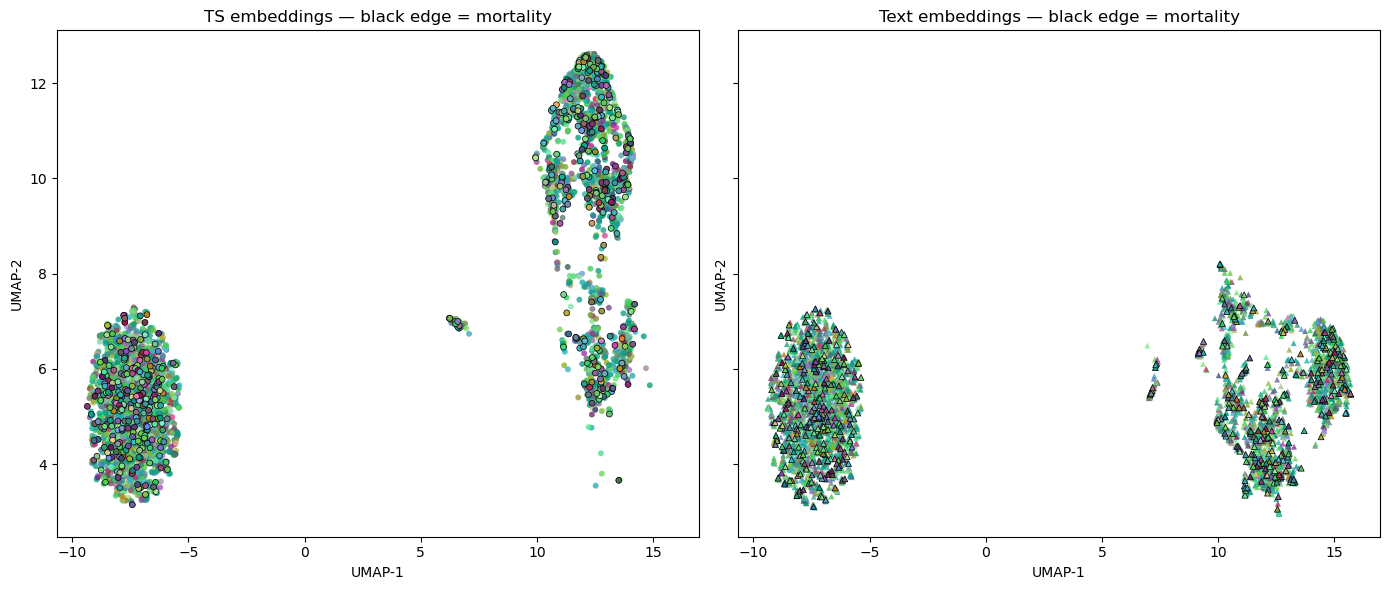

In [42]:
# ------------------------------------------------------------------
# 4) FIXED STATIC PLOTS (TS vs Text, colored by compressed labels)
# ------------------------------------------------------------------
palette = {'TS': 'o', 'Text': '^'}  # marker shape

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

for m, axi in zip(['TS', 'Text'], ax):
    sub = df[df.modality == m]
    
    # Convert RGB values to list of tuples
    colors = [tuple(rgb) for rgb in sub[['R', 'G', 'B']].values]

    # Main scatter plot
    axi.scatter(sub.x, sub.y,
                c=colors,
                s=18, marker=palette[m], alpha=0.8, linewidths=0)

    # Overlay: highlight mortality cases with a black edge
    dead = sub[sub.mort == 1]
    dead_colors = [tuple(rgb) for rgb in dead[['R', 'G', 'B']].values]
    axi.scatter(dead.x, dead.y,
                c=dead_colors,
                facecolors='none', edgecolors='black',
                linewidths=0.5, marker=palette[m], s=18)

    axi.set_title(f'{m} embeddings — black edge = mortality')
    axi.set_xlabel('UMAP-1'); axi.set_ylabel('UMAP-2')

plt.tight_layout()
plt.savefig("umap_ts_vs_text_by_rgb_labels.png", dpi=300, bbox_inches='tight')
plt.show()

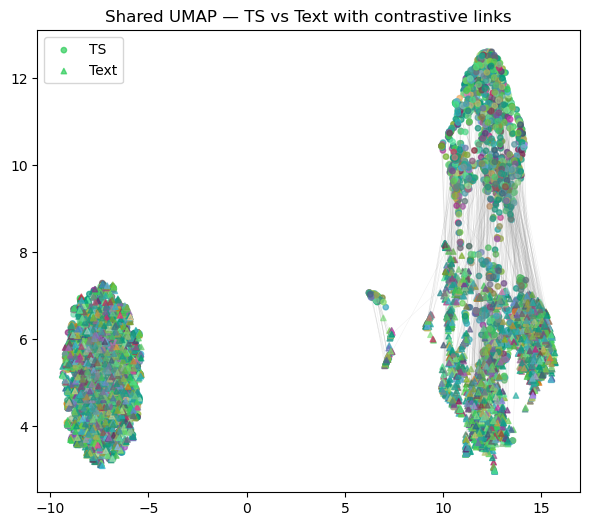

In [43]:
# ------------------------------------------------------------------
# 5) FIXED CONTRASTIVE ALIGNMENT PLOT (TS–Text pair lines)
# ------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(7, 6))

ts  = df[df.modality == 'TS']
txt = df[df.modality == 'Text']

ts_colors  = [tuple(rgb) for rgb in ts[['R', 'G', 'B']].values]
txt_colors = [tuple(rgb) for rgb in txt[['R', 'G', 'B']].values]

# Scatter both modalities
ax.scatter(ts.x, ts.y, c=ts_colors, s=15, marker='o', alpha=0.7, label='TS')
ax.scatter(txt.x, txt.y, c=txt_colors, s=15, marker='^', alpha=0.7, label='Text')

# Draw contrastive pair links every 5th to avoid clutter
for i in range(0, len(ts), 5):
    ax.plot([ts.x.iloc[i], txt.x.iloc[i]],
            [ts.y.iloc[i], txt.y.iloc[i]],
            color='grey', alpha=0.15, linewidth=0.3)

ax.legend()
ax.set_title('Shared UMAP — TS vs Text with contrastive links')
#plt.savefig("umap_ts_text_paired_lines.png", dpi=300, bbox_inches='tight')
plt.show()

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------
# UMAP separately on TS and Text embeddings
# -----------------------------------------------
print("Running UMAP on TS embeddings…")
umap_ts = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
ts_xy = umap_ts.fit_transform(ts_embeddings)

print("Running UMAP on Text embeddings…")
umap_text = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
text_xy = umap_text.fit_transform(text_embeddings)

# -----------------------------------------------
# Build two DataFrames: one for TS, one for Text
# -----------------------------------------------
n = len(ts_embeddings)

df_ts = pd.DataFrame({
    'x': ts_xy[:, 0],
    'y': ts_xy[:, 1],
    'R': r,
    'G': g,
    'B': b,
    'mort': mort_labels,
    'modality': 'TS',
    'hadm_id': hadm_ids
})

df_text = pd.DataFrame({
    'x': text_xy[:, 0],
    'y': text_xy[:, 1],
    'R': r,
    'G': g,
    'B': b,
    'mort': mort_labels,
    'modality': 'Text',
    'hadm_id': hadm_ids
})


Running UMAP on TS embeddings…


/Users/riccardoconci/miniforge3/envs/GeomML/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Running UMAP on Text embeddings…


/Users/riccardoconci/miniforge3/envs/GeomML/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


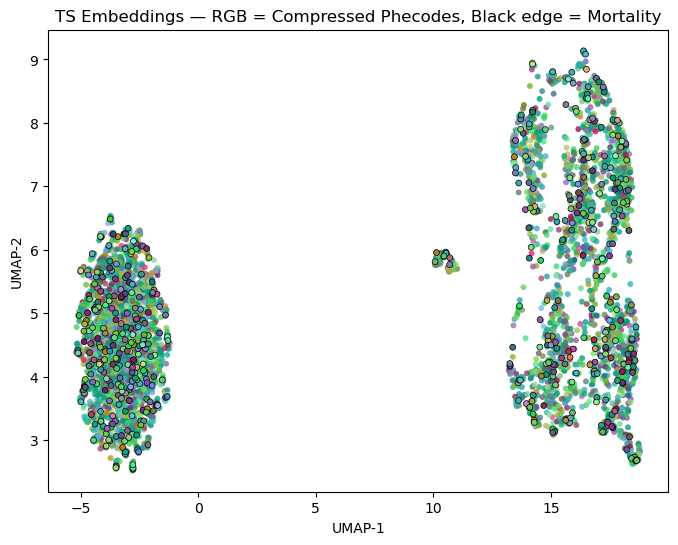

In [45]:

# -----------------------------------------------
# Plot TS embeddings
# -----------------------------------------------
colors_ts = [tuple(rgb) for rgb in df_ts[['R', 'G', 'B']].values]
mort_ts = df_ts[df_ts.mort == 1]
mort_colors_ts = [tuple(rgb) for rgb in mort_ts[['R', 'G', 'B']].values]

plt.figure(figsize=(8, 6))
plt.scatter(df_ts.x, df_ts.y,
            c=colors_ts,
            s=18, marker='o', alpha=0.8, linewidths=0)
plt.scatter(mort_ts.x, mort_ts.y,
            c=mort_colors_ts,
            facecolors='none', edgecolors='black',
            linewidths=0.5, marker='o', s=18)
plt.title('TS Embeddings — RGB = Compressed Phecodes, Black edge = Mortality')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.savefig("umap_ts_only.png", dpi=300, bbox_inches="tight")
plt.show()


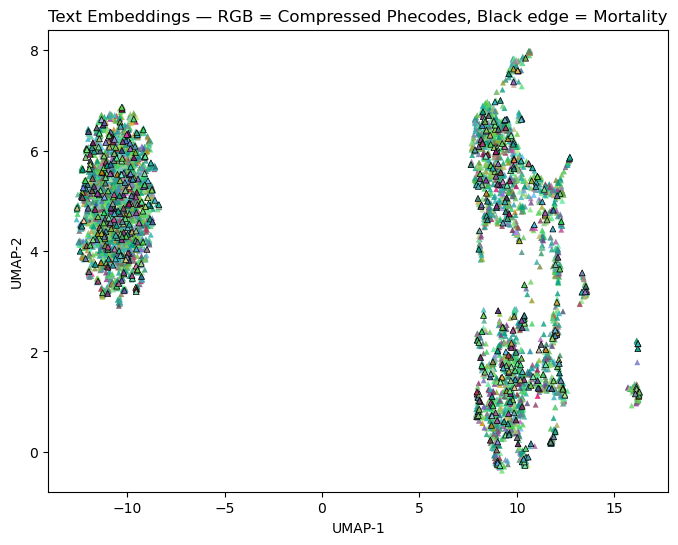

In [46]:

# -----------------------------------------------
# Plot Text embeddings
# -----------------------------------------------
colors_text = [tuple(rgb) for rgb in df_text[['R', 'G', 'B']].values]
mort_text = df_text[df_text.mort == 1]
mort_colors_text = [tuple(rgb) for rgb in mort_text[['R', 'G', 'B']].values]

plt.figure(figsize=(8, 6))
plt.scatter(df_text.x, df_text.y,
            c=colors_text,
            s=18, marker='^', alpha=0.8, linewidths=0)
plt.scatter(mort_text.x, mort_text.y,
            c=mort_colors_text,
            facecolors='none', edgecolors='black',
            linewidths=0.5, marker='^', s=18)
plt.title('Text Embeddings — RGB = Compressed Phecodes, Black edge = Mortality')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.savefig("umap_text_only.png", dpi=300, bbox_inches="tight")
plt.show()

In [47]:
df_ts

,x,y,R,G,B,mort,modality,hadm_id
0,13.722283,8.101452,0.173941,0.800424,0.345654,1,TS,21207644
1,15.154082,3.966951,0.748020,0.334072,0.573358,0,TS,25387441
2,14.832492,4.472957,0.138393,0.663892,0.619821,0,TS,28275794
3,17.413296,4.604991,0.474539,0.814070,0.485148,0,TS,20944057
4,-2.808225,5.253741,0.453834,0.546562,0.604860,0,TS,25610450
...,...,...,...,...,...,...,...,...
4707,14.154653,7.096359,0.384353,0.830819,0.309170,0,TS,29281105
4708,-3.698849,6.247076,0.609851,0.397511,0.725376,0,TS,25975262
4709,-3.118275,3.971387,0.198970,0.686001,0.747508,0,TS,25336071
4710,14.765223,6.036617,0.018285,0.615181,0.481982,0,TS,28294404


In [53]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.0, min_samples=10)  # tune eps as needed
cluster_labels = dbscan.fit_predict(df_text[['x', 'y']])
df_text['cluster'] = cluster_labels

# -1 will be noise (unclustered points)
clustered_hadm_ids_df_text = {
    label: df_text[df_text.cluster == label]['hadm_id'].tolist()
    for label in sorted(df_text['cluster'].unique())
}

for k, v in clustered_hadm_ids_df_text.items():
    print(f"Cluster {k}: {len(v)} HADM_IDs")

clustered_hadm_ids_df_text

Cluster 0: 2264 HADM_IDs
Cluster 1: 2354 HADM_IDs
Cluster 2: 94 HADM_IDs


{0: [21207644,
  25387441,
  28275794,
  20944057,
  28123036,
  22520743,
  22539553,
  27545730,
  23502748,
  26908299,
  24269410,
  24908774,
  24151322,
  29433387,
  28464936,
  27288439,
  25808855,
  23811780,
  21120103,
  22647631,
  26999894,
  29455988,
  21402491,
  26199414,
  22804873,
  25625620,
  23645403,
  28534035,
  21607542,
  27429544,
  23199947,
  26108143,
  24707622,
  23929526,
  27086820,
  24853231,
  22014866,
  22845038,
  26013832,
  29587988,
  24646187,
  23149408,
  20949875,
  27481229,
  27127456,
  26906505,
  28684675,
  24983005,
  21080798,
  27841571,
  28219717,
  24049403,
  21984802,
  23749238,
  21589242,
  21274481,
  29240692,
  25350483,
  25165702,
  28148208,
  27423830,
  27469574,
  25890905,
  21922608,
  22937678,
  28554883,
  23871636,
  29062730,
  20345509,
  20935235,
  26655154,
  22748718,
  22970251,
  28417033,
  29987799,
  29832504,
  25857020,
  28080555,
  28363531,
  22576832,
  22244274,
  27363504,
  22960872,
 

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.0, min_samples=10)  # tune eps as needed
cluster_labels = dbscan.fit_predict(df_ts[['x', 'y']])
df_ts['cluster'] = cluster_labels

# -1 will be noise (unclustered points)
clustered_hadm_ids_df_ts = {
    label: df_ts[df_ts.cluster == label]['hadm_id'].tolist()
    for label in sorted(df_ts['cluster'].unique())
}

for k, v in clustered_hadm_ids_df_ts.items():
    print(f"Cluster {k}: {len(v)} HADM_IDs")

Cluster 0: 2265 HADM_IDs
Cluster 1: 2354 HADM_IDs
Cluster 2: 93 HADM_IDs


In [51]:
clustered_hadm_ids_df_ts

{0: [21207644,
  25387441,
  28275794,
  20944057,
  28123036,
  22520743,
  22539553,
  27545730,
  23502748,
  26908299,
  24269410,
  24908774,
  24151322,
  29433387,
  28464936,
  27288439,
  25808855,
  23811780,
  21120103,
  22647631,
  26999894,
  29455988,
  21402491,
  26199414,
  22804873,
  25625620,
  23645403,
  28534035,
  21607542,
  27429544,
  23199947,
  26108143,
  24707622,
  23929526,
  27086820,
  24853231,
  22014866,
  22845038,
  26013832,
  29587988,
  24646187,
  23149408,
  20949875,
  27481229,
  27127456,
  26906505,
  28684675,
  24983005,
  21080798,
  27841571,
  28219717,
  24049403,
  21984802,
  23749238,
  21589242,
  21274481,
  29240692,
  25350483,
  25165702,
  28148208,
  27423830,
  27469574,
  25890905,
  21922608,
  22937678,
  28554883,
  23871636,
  29062730,
  20345509,
  20935235,
  26655154,
  22748718,
  22970251,
  28417033,
  29987799,
  29832504,
  25857020,
  28080555,
  28363531,
  22576832,
  22244274,
  27363504,
  22960872,
 

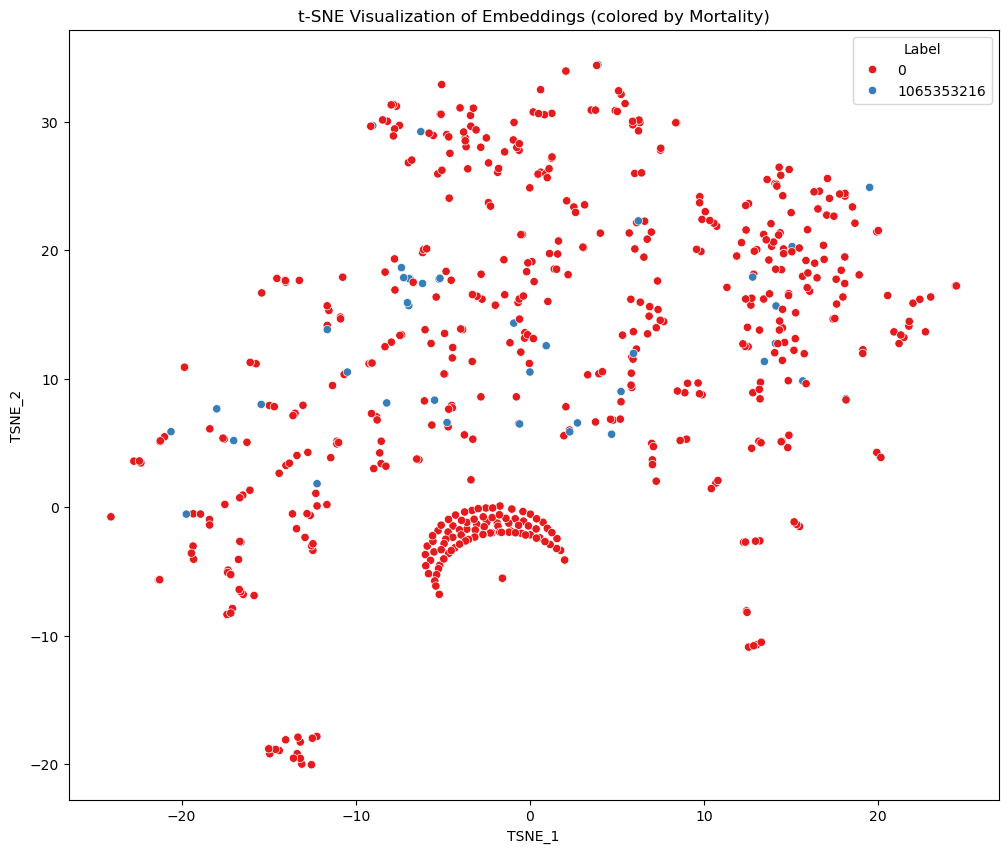

Visualization complete. Saved plots to umap_visualization.png and tsne_visualization.png


In [8]:

# Plot t-SNE results
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x="TSNE_1", y="TSNE_2",
    hue="Label",
    palette=sns.color_palette("Set1", 2),
    data=df_viz,
    legend="full"
)
plt.title(f"t-SNE Visualization of Embeddings (colored by {label_name})")
plt.savefig("tsne_visualization.png", dpi=300, bbox_inches="tight")
plt.show()

print("Visualization complete. Saved plots to umap_visualization.png and tsne_visualization.png")
